# Expected Matching Approach

In this document I present my exploratory work on matching in the Swiss Bracket, a popular tournament format in eSport. 

### Goals
- Understand why matching in Swiss Bracket is tricky
- Set theoretical fundation for "suitable" and "unsuitable" proper edge colorings
- Illustrate their properties for the SwissBracket
- Provide a usefull heuristic for search algorithm - or *live draw*.


### Swiss Bracket

The format is a variant from Swiss Round serving as a group stage before play-offs. It involved 16 teams that face each othes based on their track record. A team with 3 wins qualify for the play-offs, a team with 0 loses is eliminated.

## 1. Context

In a discussion on Tweeter about seeding in Counter-Strike Major, Graham Pitt provided an [example](https://x.com/messioso/status/1644389658942373899?s=20) capturing a core issue in the format. As we can see in the figure below, Each of the 16 involved teams performs according to their seeds (seed i beats seed j if and only if i<j). Yet after 5 round one of the top8 seed - X9INE - loses in the last round. It does not qualify to the next stage, instead seed 11 - Astralis - does. 


<center>
    <img src="img/gpe_source.jpeg" width="600" alt="Example of a flawed in the format, source: https://x.com/messioso/status/1644389658942373899?s=20">
</center>


To adress the problem, Graham Pitt [proposes](https://x.com/messioso/status/1644391221945683968?s=20) that:

> Matchups in this Swiss format should be done 1vs9, 2vs10, 3v11 etc. It's still a +8 seeding gap so favourites should still win. But it preserves matches like 8vs9, 7vs10 which under normal circumstances should be deciding the final 3 spots.

> In the current system it's actually beneficial to have a lower seed, face a better team in the initial matchup who you should still be able to comfortably beat. They then inflate your bucholz by winning instead of losing - think how 1v9 is different to 1v16 in this example.


My look on the example differs deeply. First, there are two unrealistic underlying hypothesis. Secondly, a miss understanding of the limitation of the format leads to abusive conclusion. Lastly, bucholz - and generaly tiebreaking - has not much to do with what happens here. The format differs quiet a lot from *Swiss Round* in that regard.

#### Hidden Hypothesis:
- Initial seeds are correct: Each teams is correctly ranked. Which for unique international competition can not be assumed. A quality ranking may capture accuratly the best teams involved and the worst. But I consider optimistic that any ranking can corretcly distinguish the 8th form the 9th best teams coming from different regions across the globe with limited confrontation throught the year.

- Each teams performs according to their level: Competition is unpredictibale by nature - it is precisely what makes it so untertaining. This holds particularly true for major event, where pressure/preparation/ambition is at is highest.

#### Format limitation
The format qualifies two teams after the 3rd round. Which means it contains two single elimination brakcet of each 8 teams. As a consequences, if the seedings are inaccurate and the top8 teams are all in the same bracket, one of the bottom 8 team will qualify. This is an upper bound in term of format fairness. And a good one. In other format that aims at qualifying 8 teams among 16, we can cite group stages. 4 groups of 4 teams playing *Round Robins*. In a worst case scenario the top 4 teams are all in the same group, which results in two top teams not qualifying, and symetrically two bottom 4 teams qualifing. 

#### Bucholz and tiebreaker.
The *Swiss Bracket* is inspired by the *Swiss Round* and share many similarities. But they have different purposes and properties. The Swiss Rounds excells at crowning a winner in $n*log(n)$ games. However it does not provide much insight for the global standing, specialy at the middle of the table. Tiebreaker aims at compensating this weakness. Furthermore, Bucholz is not a tiebreaker, it is an alternative scoring system that is used sometimes to crown a different tournament winner by accounting for particulary unfair pairings during the tournament. People refering to Bucholz as a tiebreaking usually have in mind the solkoff policy. The Swiss Bracket has opposite strenght and weaknesses, it does not crown a champion. Instead it aims at spliting 16 teams into 8 qualified and 8 eliminated teams - distinguish the middle of the standing - the exact weakness of the swissbracket. This is achieved by making early elimination/qualification and  playing additional rounds among remaining teams - the middle of the pack.

#### Personal Interpretation of the example
To me, a minmal error (seed 11 qualified instead of seed 8) in the range of the expected fairness limitation of the format, is not the sign of any issue. Its appearance in an ideal but unlikely scenario, is more of a *fun fact* than a reason of concern. However I consider the proposed so called solution - which is currently enforced by valve [rulebook](https://github.com/ValveSoftware/counter-strike_rules_and_regs/blob/main/major-supplemental-rulebook.md) - dangerous.

Indeed, in the format, the bests teams qualify relatively easily and the worst gets eliminate fast. However the average level teams need to face each others as many time as possible to optimaly sort them. Making them face in less round (using *speedup* matching) goes against the spirit and goal of the format.

## 2. Problem Statement

First we need to understand what people complains about. The none qualification of seed 8 is the consequences of a matching against an apriori better team, seed 6. The qualification of seed 11 is the consequence of an apriori weak opponent - seed 12. The matching is not adequate. 

There are 15 different perfect matching for 6 teams. Among those, only 6 options do pair each a priori top3 with an apriori bottom3 team. 
We are looking for a perfect matching on the Complete Bipartite Graph $K_{3,3}$ rather than on the complete graph $K_6$. These 6 perfect matchings on $K_{3,3}$ are indeed the top favoured options according to Valve's rulebook [ADD REFERENCE]().

<center>
    <img src="img/k33_STAR_FLAT_colors.png" width="600" alt="source: https://en.wikipedia.org/wiki/Chord_diagram_%28mathematics%29">
</center>

The six involved teams are $seeds := \{s_5, s_6, s_8, s_9, s_{11}, s_{12}\}$, i.e Ence, Vitality, X9INE, G2, Astralis and Monte. These teams face each other on exactly three occasions. In $Round_1$, with pairings $(s_5, s_{12}), (s_6, s_{11}), (s_8, s_9)$ which is indeed a perfect match on $K_{3,3}$. In $Round_3$, with pairings $(s_5, s_{11}), (s_6, s_{12})$.

Which leads to the identification of a **factual issue**:

> A complete bipartite graph $K_{n,n}$ has a proper n-edge-coloring

Which means that $K_{3,3}$ has a proper 3-edge coloring, thus it is possible that the 6 involved teams face each others in Round 1, 3, and 5. 
Yet none of the 6 favored pairings are available in $Round_5$.

While it is true that in the first and second round, the actual pairings are perfect matching on $K_{4,4}$ involving also $s_7$ and $s_{10}$, it is hard to believe that additional teams - i.e. more parings options for the same amount of rounds - makes it impossible to find perfect matchings in the last round.


**The Problem I addressed and solved is why there are no available perfect matching in $Round_5$ and how to ensure there is one.**

## Understanding the issue in $Round_5$

Three key ingredients were necessary for me to concile the practical reality of the example with the theoretical possiblity.

- The 6 perfect matchings on $K_{3,3}$ form two **disctinct** proper n-edge coloring, I named them *Flat* and *Star*
- Flat and Star are **incompatible**. Each perfect matching of Star shares exactly one edge with each perfect matching of Flat.
- $Round_1$ & $Round_3$ produces a **pattern that does not exist** neither in *Flat* nor *Star*.

The following 

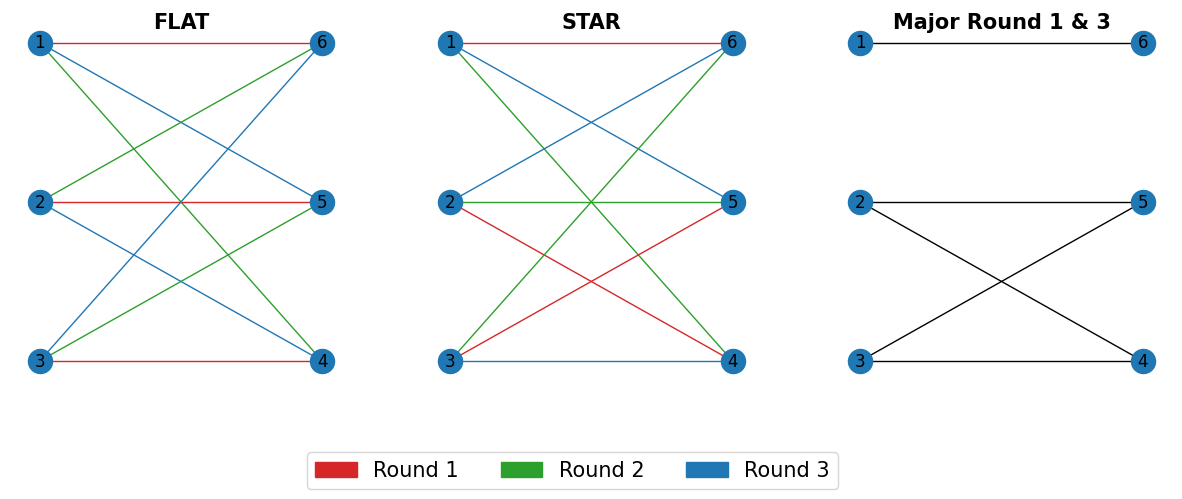

In [1]:
from ema.completebipartite import CompleteBiPartite as CBG
from ema.coverings import FLAT, STAR
from ema.plot import plot_coverings

import matplotlib.pyplot as plt
import networkx as nx

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scenario from the Example - displayed on K3,3
plt.sca(axes[2])
majorR1R3 = nx.Graph([(1,6), (2,5), (3,4), (2,4), (3,5)])
nx.draw(majorR1R3, with_labels=True, pos=CBG(6).positions(), edge_vmin=0)
axes[2].text(0.5, 0.94, "Major Round 1 & 3", transform=axes[2].transAxes, ha="center",va="bottom", fontsize=15,fontweight="bold")

# FLAT & STAR proper coloring
plot_coverings([FLAT, STAR], ['FLAT', 'STAR'], axes.flatten(), fig)

## 3. Diagnostic

The pairings in the Example correspond to the matching of (FLAT, Round 1) and (STAR, Round 1), And the resulting pattern can not be part of a proper edge coloring on $K_{3,3}$. **Virtually** the encounter (1 versus 6) is played twice, In practice there are two **hidden** games involoving teams not in $K_{3,3}$, NIP and Eternal Fire.

To analyze the relationship between different proper 3-edge-colorings, we adopt the language of 1-factorizations, where each coloring corresponds to a partition into factors (perfect matchings)." The following construct explains the issue better. For clarity, in this notebook, a proper edge coloring refers strictly to a practical matching strategy in the Swiss Bracket tournament.

Let us consider an intersection graph where each node represents a factor of either ther Star or Flat 1-factorization of $K_{3,3}$. and each edge represent a common edge. For example, the factors *Flat Round1* (F1) and *Star Round 1* (S1) share the edge (1, 6) thus are connected.

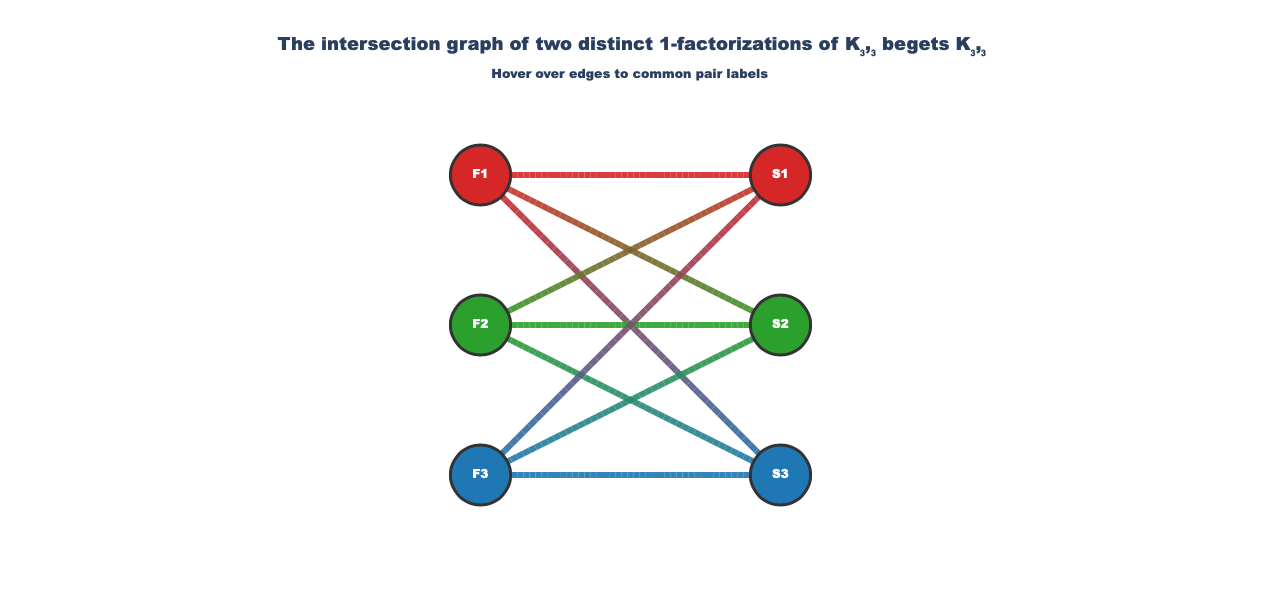

In [2]:
from ema.intersection import intersection_graph_STAR_FLAT

fig = intersection_graph_STAR_FLAT()
fig.show()

### Conclusion

In a tournament, we do not want to play the same game twice. As a consequence, in this intersection graph we must select a factor that has no common edge with any previously selected ones. Since this is a complete bipartite graph $K_{3,3}$ and the two previous rounds were each selected from distinct sets (one from FLAT, one from STAR), there are no valid options remaining.

The problem happens in the pairings of $Round_3$ of the major. *Virtually the encounter (1, 6)* is played a second time . As a solution, I propose what I call *The Expected Matching Approach*. A method to build Proper Edge coloring with desired properties. I introduce two such Algorithm.

- The Cross Algorithm: I claim it is not suited for Swiss Bracket pairings.
- The Rotation Algorithm: I claim it suits the Swiss Bracket well.


## 4. Expected Matching Approach

We are building proper edge coloring of $K_{4,4,}$

Let us consider $K_{3,3} := (V_1, V_2, E)$ with$ V_1 := \{1, 2, 3\}$ and $V_2 := \{4, 5, 6\}$ and $E:= V_1 \times V_2$.  
Let $M$ be a perfect matching on $K_{3,3}$, and $n_M(u):= v$, with $v \in M$  
$N(M) := \{N_1, N_2, N_3\}$ the set of neighbors of M in the intersection graph,  
and $(u_i, v_i)$ the common edge between M and $N_i$.

### 4.1 The Cross Algorithm 

The goal of the approach is to reproduce the pattern present in the example, where one encounter is virtually played twice.

Inputs: $M$ be a perfect matching on $K_{3,3}$,  
Output: $C':= \{M_1', M_2', M_3', M_4'\}$, a proper edge coloring of $K_{4,4}$  
Steps:  
1. Select one perfect matching of $K_{3,3}$
2. $V_1' := V_1 \cup \{a\}$, $V_2' := V_2 \cup \{b\}$
3. let $M_1' := M \cup \{(a, b)\}$
4. let $M_{i+1}' := N_i$ \ $\{(u_i, v_i)\} \cup \{(a, v_i), (u_i, b)\}$ $\forall i:= 1,2,3$

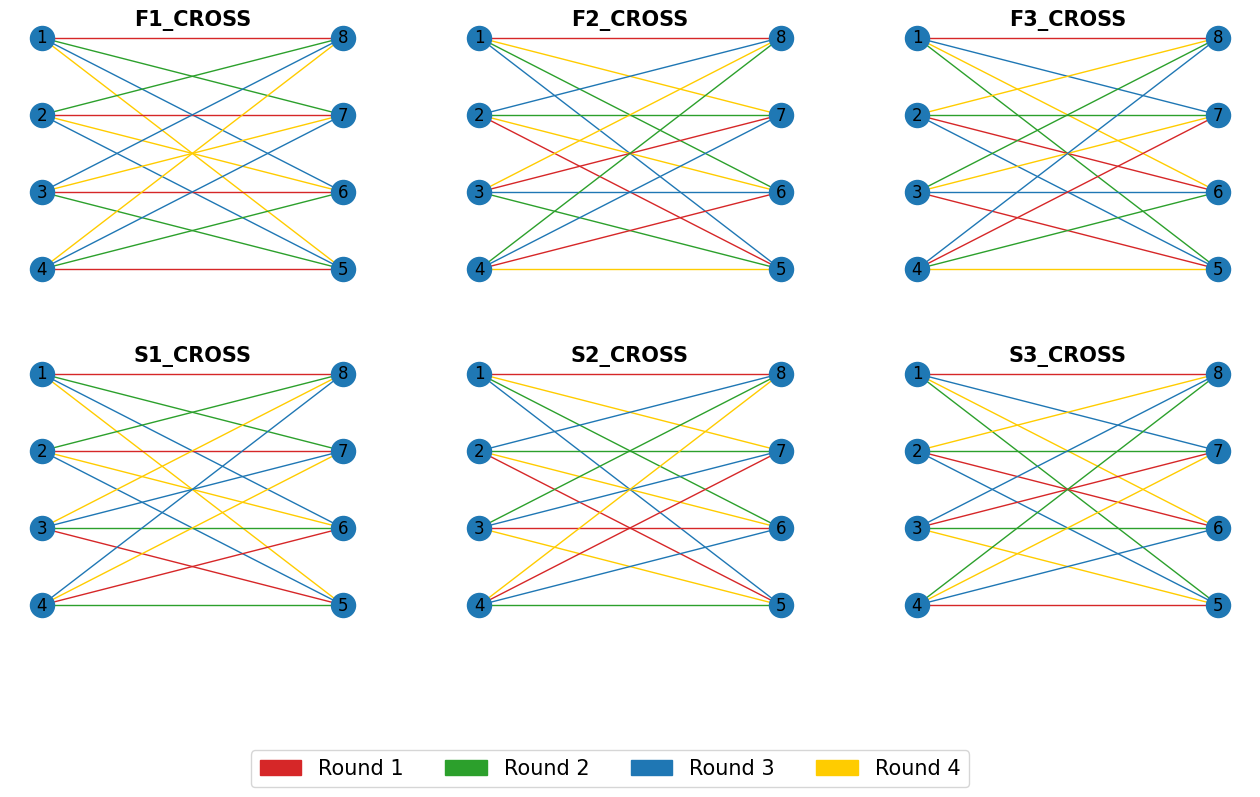

In [3]:
#import numpy as np

import ema.algorithm as alg
#import ema.analysis as an

k44_bad = alg.cross_options(FLAT, STAR) + alg.cross_options(STAR, FLAT)

fig, axes = plt.subplots(2, len(k44_bad)//2, figsize=(16, 8))
names = ['F1_CROSS', 'F2_CROSS', 'F3_CROSS', 'S1_CROSS', 'S2_CROSS', 'S3_CROSS']
plot_coverings(k44_bad, names, axes.flatten(), fig)

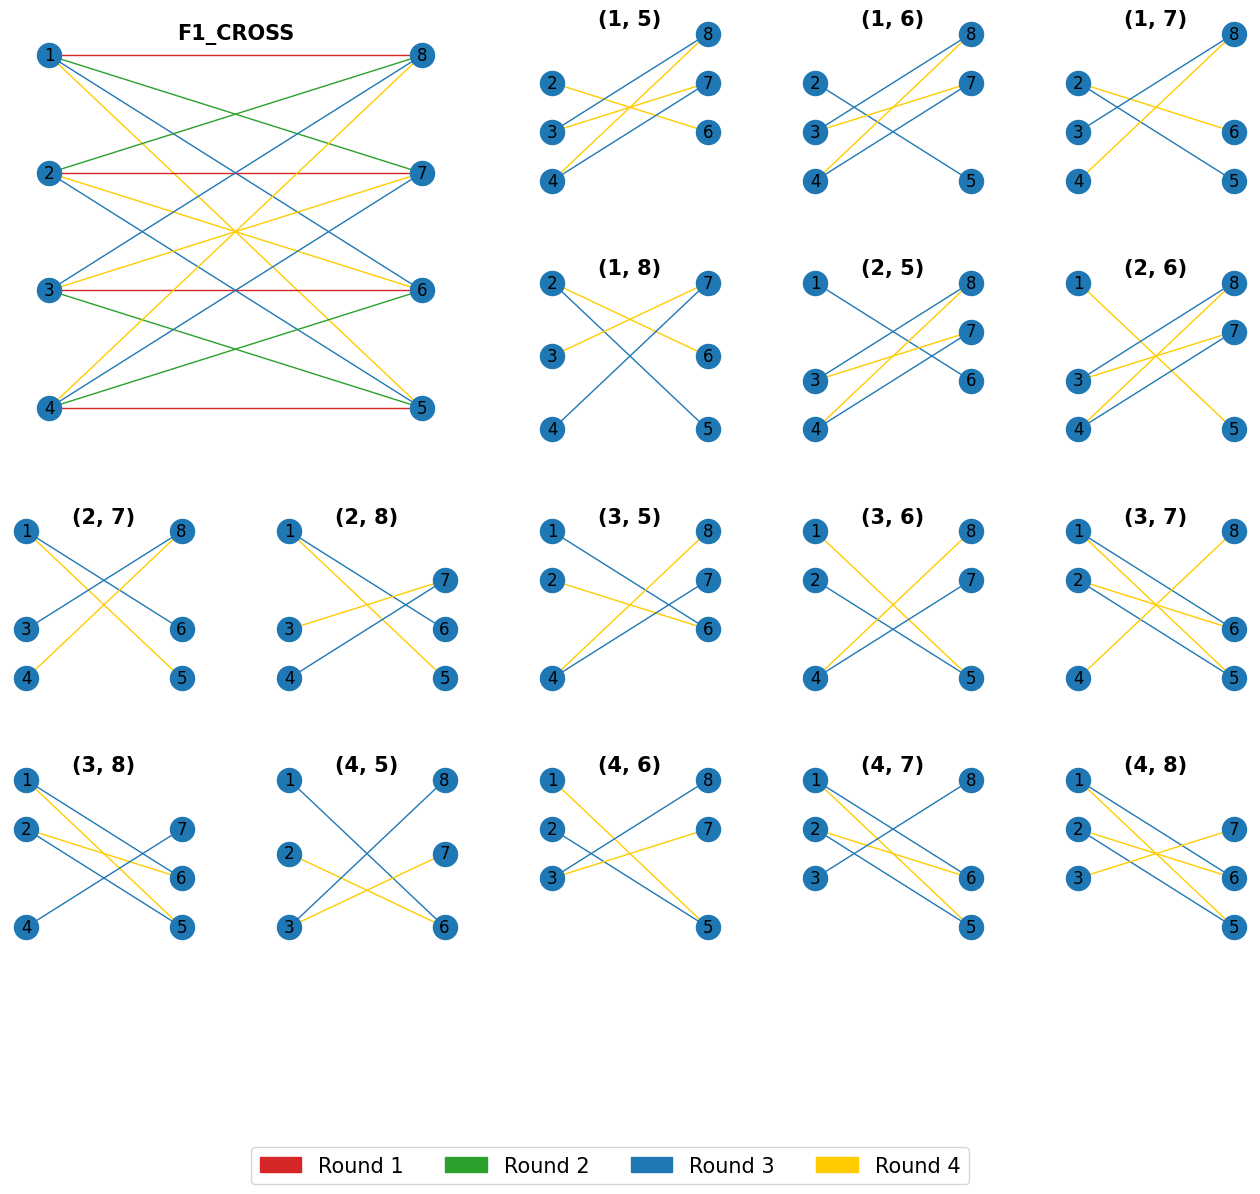



example seed 7 (NIP): 3 & seed 10 (Eternal Fire): 6  	=>	scenario (3, 6)


In [4]:
from ema.plot import set_rounds_5_layout

pairs_removed = [(v1, v2 )for v1 in range(1, 5) for v2 in range(5, 9)]
k44_covering = k44_bad[0]
fig, axes, ax_k44 = set_rounds_5_layout((16,12))

for pair, ax in zip(pairs_removed, axes.values()):
    # proper edge covering
    k44 = CBG(n=8)
    k44.set_edges_color(k44_covering)

    # remove first 2 rounds
    for i, (color, day) in enumerate(k44_covering.items()):
        if i<2:
            k44.graph.remove_edges_from(day)
    
    # qualify and eliminate a teams
    k44.graph.remove_nodes_from(list(pair))

    # plot
    plt.sca(ax)
    k44.plot()
    ax.text(0.5, 0.94, pair, transform=ax.transAxes, ha="center",va="bottom", fontsize=15,fontweight="bold")

plot_coverings([k44_covering], ['F1_CROSS'], [ax_k44], fig)

# Little helper between team names and seedings in examples / k,44 / k3,3
seed_mapping = {'s5':1, 's6':2, 's7':3, 's8':4, 's9':5, 's10':6, 's11':7, 's12':8}
print('\n\nexample seed 7 (NIP):', seed_mapping['s7'], '& seed 10 (Eternal Fire):', seed_mapping['s10'],
      f" \t=>\tscenario ({seed_mapping['s7']}, {seed_mapping['s10']})")

### 4.2 The Rotation Algorithm

The goal of the approach is to garantee the existence of a perfect mathing for the $Round_5$, by avoiding duplicate *virtual-encounter*.

Inputs: $C:= \{M_1, M_2, M_3\}$, a proper edge coloring of $K_{3,3}$  
Output: $C':= \{M_1', M_2', M_3', M_4'\}$, a proper edge coloring of $K_{4,4}$  
Steps:  
1. Select one perfect matching of $K_{3,3}$
2. $V_1' := V_1 \cup \{a\}$, $V_2' := V_2 \cup \{b\}$
3. let $M_1' := M \cup \{(a, b)\}$
4. Order $V_1' = (a, 1, 2, 3)$ and $V_2' = (b, 6, 5, 4)$.
   For $i = 0, 1, 2, 3$, construct $M_{i+1}'$ by pairing:
   $$M_{i+1}' = \{(V_{1,j}', V_{2, (j-i) \mod 4}') : j = 0, 1, 2, 3\}$$

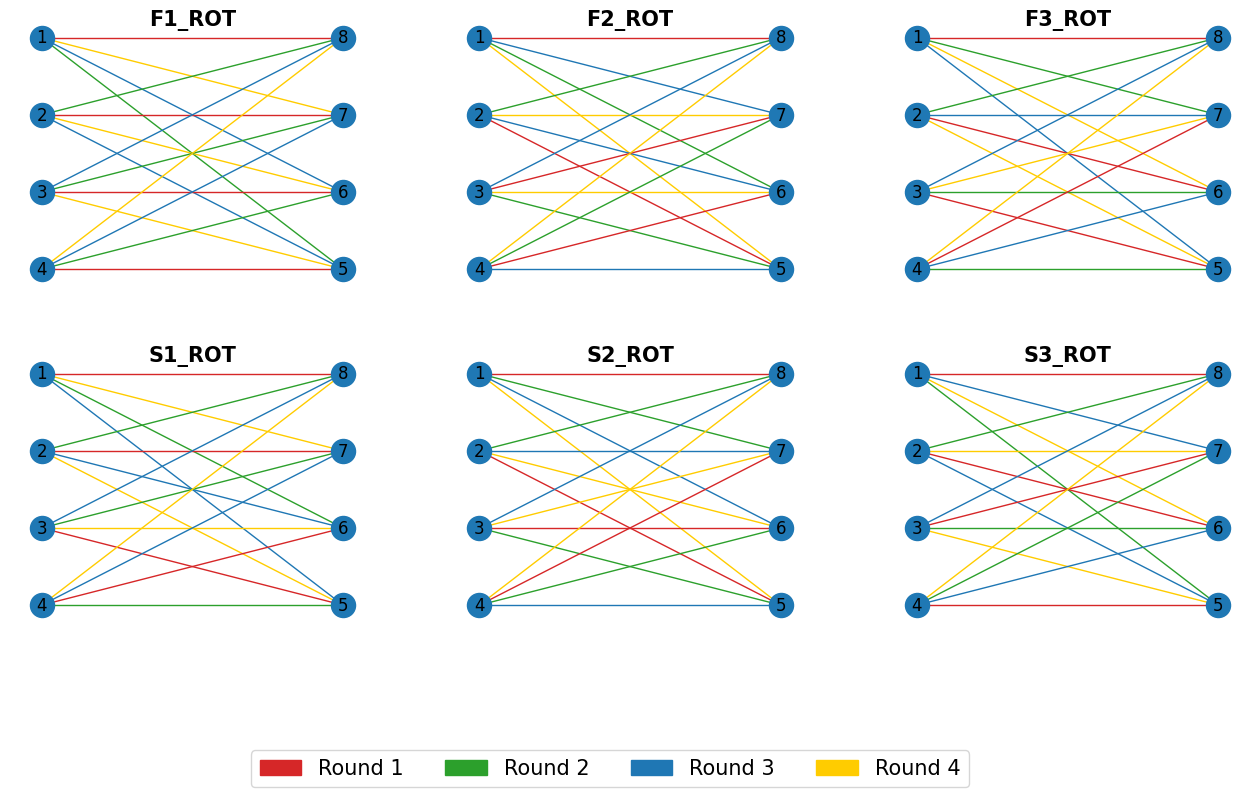

In [5]:
k44_good = alg.roll_options([FLAT, STAR])

fig, axes = plt.subplots(2, len(k44_good)//2, figsize=(16, 8))
names = ['F1_ROT', 'F2_ROT', 'F3_ROT', 'S1_ROT', 'S2_ROT', 'S3_ROT']
plot_coverings(k44_good, names, axes.flatten(), fig)

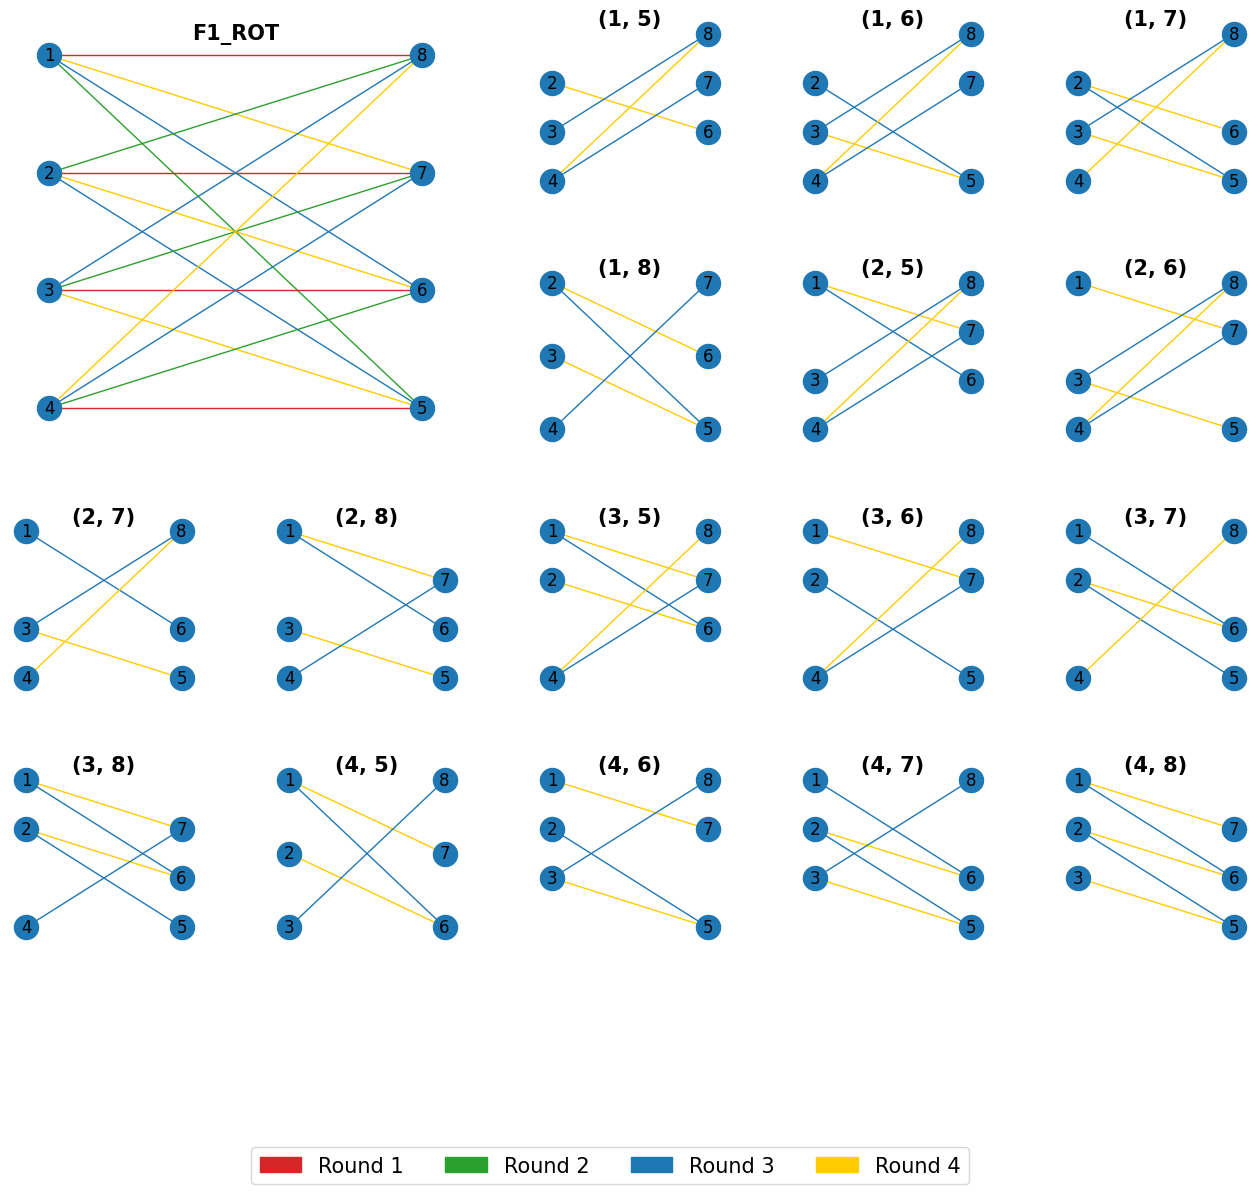

In [6]:
k44_covering = k44_good[0]
fig, axes, ax_k44 = set_rounds_5_layout((16,12))

for pair, ax in zip(pairs_removed, axes.values()):
    # proper edge covering
    k44 = CBG(n=8)
    k44.set_edges_color(k44_covering)

    # remove first 2 rounds
    for i, (color, day) in enumerate(k44_covering.items()):
        if i<2:
            k44.graph.remove_edges_from(day)
    
    # qualify and eliminate a teams
    k44.graph.remove_nodes_from(list(pair))

    # plot
    plt.sca(ax)
    k44.plot()
    #title = f"({seed_mapping[pair[0]]}, {seed_mapping[pair[1]]})"
    ax.text(0.5, 0.94, pair, transform=ax.transAxes, ha="center",va="bottom", fontsize=15,fontweight="bold")

plot_coverings([k44_covering], ['F1_ROT'], [ax_k44], fig)

In [7]:
from utils import swiss_bracket_n6 as sbn6

# Valve Rulebook preferences for Round5
labels = list(range(1, 7))
preferences = [{variant[i]: variant[i+1] for i in range(0, 6, 2)} for variant in sbn6(labels)]

matchings = [list(coloring.keys())[0][:2]+'_ROT' for coloring in k44_good]
matchings += [list(coloring.keys())[0][:2]+'_CROSS' for coloring in k44_bad]
colorings = k44_good+k44_bad

covering = {m:c for m, c in zip(matchings, colorings)}
pairs_removed = [(v1, v2 )for v1 in range(1, 5) for v2 in range(5, 9)]

## 5. Properties for Swiss Bracket pairings

We are interested in the practical application of proper edge colorings for pairings in the swiss bracket.
To compare the differents options computed by the cross and rotation algorithm, we use Valve's matchings preferences.

In the following table, each row is a proper edge coloring used for pairings in $Round_1$ & $Round_3$. Each columns is a different scenario, i.e which two teams are removed (qualification/elimination). The content of the cell indicate which of the six preferd perfect matching are available.

In [8]:
import pandas as pd
import networkx as nx

data = pd.DataFrame(index=covering.keys(), columns = pairs_removed)

for pair in pairs_removed:
    top = [1,2,3,4]
    top.remove(pair[0])
    bottom = [5,6,7,8]
    bottom.remove(pair[1])
    for name, cover in covering.items():
        k44 = CBG(n=8)
        k44.set_edges_color(cover)
        g = k44.graph
        for i, (color, day) in enumerate(cover.items()):
            if i<2:
                g.remove_edges_from(day)
        g.remove_nodes_from(pair)
        #labels = k44
        matchings = [{variant[i]: variant[i+1] for i in range(0, 6, 2)} for variant in sbn6(top+bottom)]
        data.at[name, pair] = [i+1 for i, matching in enumerate(matchings) if nx.is_perfect_matching(g, matching)]
data

,"(1, 5)","(1, 6)","(1, 7)","(1, 8)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(3, 5)","(3, 6)","(3, 7)","(3, 8)","(4, 5)","(4, 6)","(4, 7)","(4, 8)"
F1_ROT,[5],[5],[4],[4],[5],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[1]
F2_ROT,[4],[3],[3],[1],[4],[3],[6],[1],[4],[6],[6],[1],[4],[6],[6],[5]
F3_ROT,[3],[6],[5],[5],[6],[6],[5],[5],[6],[6],[4],[5],[6],[6],[4],[4]
S1_ROT,[5],[5],[6],[6],[4],[5],[6],[6],[4],[4],[6],[6],[4],[4],[6],[2]
S2_ROT,[6],[3],[3],[3],[6],[6],[3],[3],[6],[6],[6],[3],[6],[6],[6],[6]
S3_ROT,[3],[4],[5],[2],[3],[4],[4],[2],[6],[4],[4],[2],[6],[4],[4],[3]
F1_CROSS,"[5, 6]","[5, 6]",[],[],"[5, 6]","[5, 6]",[],[],[],[],"[4, 6]","[4, 6]",[],[],"[4, 6]","[4, 6]"
F2_CROSS,"[2, 5]",[],"[1, 3]",[],[],"[3, 5]",[],"[1, 6]",[],"[3, 5]",[],"[1, 6]","[3, 4]",[],"[5, 6]",[]
F3_CROSS,[],"[1, 6]","[1, 6]",[],"[4, 6]",[],[],"[1, 3]",[],"[3, 4]","[3, 4]",[],"[3, 5]",[],[],"[2, 4]"
S1_CROSS,"[5, 6]","[5, 6]",[],[],"[5, 6]","[5, 6]",[],[],[],[],"[4, 6]","[4, 6]",[],[],"[4, 6]","[4, 6]"


### 5.1 Observation

As we can see, in the case of matching computed with the roation algorithm, there is always one of the favourite 6 options, the ones corresponding to a pefect matching on $K_{3,3}$. In the case of the Cross options, there is either 2 ideal draws for the last round. But in half of the scenario, only suboptimal matchings are avalable (like in the example where seed11 faces seed12).

F1_CROSS correspond to the pairing system of the example. It can be seen as the worst. Indeed, if *team 1 or 2* qualifies and either *team 7 or 8* are elminiated, then there are only suboptimal options. Yet these are the ideal scenario with quality seedings.


### 5.2 About the ordering of colors

N proper edge coloring are not ordered, but corresponding round sin competition are. The following cells investigate the relevance of the *color order* for *F1_CORSS* with *F1_STAR*

In [9]:
import itertools

selections = ['F1_ROT', 'F1_CROSS']
selected = {selection: covering[selection] for selection in selections}
starting_rounds = list(itertools.combinations(list(range(4)), 2))
covers = list(itertools.product(selections, starting_rounds))

rounds_orderings = pd.DataFrame(index=covers, columns=pairs_removed)

for pair in pairs_removed:
    top = [1,2,3,4]
    top.remove(pair[0])
    bottom = [5,6,7,8]
    bottom.remove(pair[1])
    for name, cover in selected.items():
        for start in starting_rounds:
            k44 = CBG(n=8)
            k44.set_edges_color(cover)
            g = k44.graph
            
            for i, (color, day) in enumerate(cover.items()):
                if i in start:
                    g.remove_edges_from(day)
    
            g.remove_nodes_from(pair)
            #labels = k44
            matchings = [{variant[i]: variant[i+1] for i in range(0, 6, 2)} for variant in sbn6(top+bottom)]
            rounds_orderings.at[(name, start), pair] = [i+1 for i, matching in enumerate(matchings) if nx.is_perfect_matching(g, matching)]
rounds_orderings

,"(1, 5)","(1, 6)","(1, 7)","(1, 8)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(3, 5)","(3, 6)","(3, 7)","(3, 8)","(4, 5)","(4, 6)","(4, 7)","(4, 8)"
"(F1_ROT, (0, 1))",[5],[5],[4],[4],[5],[4],[4],[4],[4],[4],[4],[4],[4],[4],[4],[1]
"(F1_ROT, (0, 2))","[1, 6]",[],"[2, 4]",[],[],"[4, 6]",[],"[2, 5]","[3, 4]",[],"[5, 6]",[],[],"[3, 5]",[],"[1, 6]"
"(F1_ROT, (0, 3))",[1],[5],[5],[5],[5],[5],[5],[5],[5],[5],[5],[4],[5],[5],[4],[4]
"(F1_ROT, (1, 2))",[4],[4],[4],[1],[4],[4],[1],[1],[4],[1],[1],[1],[1],[1],[1],[1]
"(F1_ROT, (1, 3))",[],"[3, 5]",[],"[1, 6]","[2, 5]",[],"[1, 3]",[],[],"[1, 2]",[],"[3, 4]","[1, 6]",[],"[2, 4]",[]
"(F1_ROT, (2, 3))",[1],[1],[1],[1],[1],[1],[1],[5],[1],[1],[5],[5],[1],[5],[5],[5]
"(F1_CROSS, (0, 1))","[5, 6]","[5, 6]",[],[],"[5, 6]","[5, 6]",[],[],[],[],"[4, 6]","[4, 6]",[],[],"[4, 6]","[4, 6]"
"(F1_CROSS, (0, 2))","[1, 6]",[],"[2, 4]",[],[],"[4, 6]",[],"[2, 5]","[3, 4]",[],"[5, 6]",[],[],"[3, 5]",[],"[1, 6]"
"(F1_CROSS, (0, 3))",[],"[2, 5]","[2, 5]",[],"[3, 5]",[],[],"[2, 4]","[3, 5]",[],[],"[2, 4]",[],"[3, 4]","[3, 4]",[]
"(F1_CROSS, (1, 2))","[4, 6]",[],[],"[1, 3]",[],"[1, 6]","[1, 6]",[],[],"[1, 6]","[1, 6]",[],"[1, 2]",[],[],"[5, 6]"


As we can see, for the cross options, the ordering does not matter - it is a structural issue. There are always 8 scenarios with 2 perfect matchings available in in $Round_5$ and 8 cases with no ideal pairings.

For the S1_ROT proper edge coloring, we can see that if we first play pairings according to the color 0 and 2 (red and blue), or 1 and 3 (green and yellow) then we face the same problems as with the cross algorithm.


### 5.3 Cylces in $K_{4,4}$

We keep the notation from section 4. Expected Matching, and denote $\{c_1, c_2, c_3, c_4\}$ the set of colors of a proper edge coloring. And consider a Proper edge coloring of K_{4,4}. Assume the existence of a cycle $(u_1, v_1, u_2, v_2)$ which edges are colored by two colors $\{c_1, c_2\}$

#### Lemme 1: Paired cycles
There is a cycle of size 4 with edges in $V_1$ \ $\{u_1, u_2\}$ \times $V_2$ \ $\{v_1, v_2\}$ and colors are $\{c_1, c_2\}$.

#### Lemme 2: Complementary cycles
There is a cycle $(u_1, v_3, u_2, v_4)$ with $v_3, v_4 \in V_2$ \ $\{v_1, v_2\}$ which edges are colors by colors $\{c_3, c_4\}$.


## 6. Heuristic for live pairings

To deepen the understanding of matchings in this tournament, I proposed a cycle basis color analysis. It provides structural details of matchings. 

What we are interested most in, are cycle which edges are colored only with two colors. For example, *S1_ROT* contains only one such cycle in the basis.

This cycle is colored by color 1 and 3, and connect nodes (5,2,8,4)

In [10]:
import ema.analysis as an

print("nodes | colors | number of colors")
for name, options in selected.items():
    print('\n',name)
    for cycle in an.cycle_basis_analysis(options):
        if cycle[2] == 2:
            print(f"\033[31m{cycle[0]} {cycle[1]} {cycle[2]}\033[0m")
            
        else:
            print(cycle[0], cycle[1], cycle[2])


nodes | colors | number of colors

 F1_ROT
[5, 3, 8, 4] [3, 2, 3, 0] 3
[6, 3, 8, 4] [0, 2, 3, 1] 4
[7, 3, 8, 4] [1, 2, 3, 2] 3
[5, 2, 8, 4] [2, 1, 3, 0] 4
[6, 2, 8, 4] [3, 1, 3, 1] 2
[7, 2, 8, 4] [0, 1, 3, 2] 4
[5, 1, 8, 4] [1, 0, 3, 0] 3
[6, 1, 8, 4] [2, 0, 3, 1] 4
[7, 1, 8, 4] [3, 0, 3, 2] 3

 F1_CROSS
[5, 3, 8, 4] [1, 2, 3, 0] 4
[6, 3, 8, 4] [0, 2, 3, 1] 4
[7, 3, 8, 4] [3, 2, 3, 2] 2
[5, 2, 8, 4] [2, 1, 3, 0] 4
[6, 2, 8, 4] [3, 1, 3, 1] 2
[7, 2, 8, 4] [0, 1, 3, 2] 4
[5, 1, 8, 4] [3, 0, 3, 0] 2
[6, 1, 8, 4] [2, 0, 3, 1] 4
[7, 1, 8, 4] [1, 0, 3, 2] 4


In [11]:
# Get indices of empty options
mask = rounds_orderings.map(lambda x: x == [])
empty_cells = mask.stack()
empty_cells = empty_cells[empty_cells].index.tolist()
empty_cells = set(empty_cells)

problems_rot = an.predictions('F1_ROT', [6, 2, 8, 4], [3, 1, 3, 1])
problems_cross = an.predictions('F1_CROSS', [7, 3, 8, 4], [3, 2, 3, 2])
problems_cross = problems_cross.union(an.predictions('F1_CROSS', [6, 2, 8, 4], [3, 1, 3, 1]))
problems_cross = problems_cross.union(an.predictions('F1_CROSS', [5, 1, 8, 4], [3, 0, 3, 0]))
all_problems = problems_cross.union(problems_rot)
print(len(problems_rot), len(problems_cross), len(all_problems), len(empty_cells))

# set equivalence assertion : dataframe with no options are the predicted scenarios
assert empty_cells == all_problems

16 48 64 64
